# Принятие решений в бизнесе

## Цели и задачи

Приоритизировать гипотезы, предложенные для увеличения выручки; запустить A/B-тест и проанализировать результаты. Дать предложения для увеличения выручки.

### Данные для первой части
Файл hypothesis.csv. 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Данные для второй части
Файл orders.csv. 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


Файл visitors.csv. 
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


### План работы по проекту:

- Часть 1. Приоритизация гипотез.

#### Задача:
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


- Часть 2. Анализ A/B-теста

#### Задача:
1. Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

2. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
 a) Остановить тест, зафиксировать победу одной из групп.
 b) Остановить тест, зафиксировать отсутствие различий между группами.
 c) Продолжить тест.

Начинаем работу с загрузки файлов и их подготовки к анализу

In [1]:
# загружаем библиотеки

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
from venn import venn

In [2]:
# загружаем данные
try:
    hypothesis = pd.read_csv('hypothesis.csv') # хранит информацию по гипотезам
     
except:
    
    hypothesis = pd.read_csv('https://cod...hypothesis.csv') 
    

Посмотрим что представлют из себя данные о гипотезах

In [3]:
hypothesis.head(10).style

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Переименуем столбцы со строчной буквы

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


#### В ДФ hypothesis 9 строк и 5 столбцов с данными

## Часть 1. Приоритизация гипотез.

#### 1.1 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
# Вычисляем по формуле для ICE
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# Создаем новый DataFrame только с 'hypothesis' и 'ICE'
ice_data = hypothesis[['hypothesis', 'ICE']]

# Сортируем по столбцу 'ICE' по убыванию
sorted_ice = ice_data.sort_values(by='ICE', ascending=False)
pd.options.display.max_colwidth = 1
sorted_ice['ICE'] = sorted_ice['ICE'].round(3)


In [7]:
sorted_ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


После упорядочивания, мы можем сказать, что приоритетными считаются гипотезы 8, 0 и 7.

#### 1.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [8]:
# вычисляем по формуле RICE
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# Выводим из получившейся таблицы столбцы 'hypothesis' и 'RICE', отсортируем по столбцу 'RICE'
sorted_rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

In [9]:
sorted_rice.style

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000


#### 1.3 Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

После подсчета RICE в списке лидирующих гипотез остаются 7 и 0. Однако добавляются гипотезы 2 и 6, а гипотеза 8  - лидер по ICE уходит аж на 5 место. 

**Таким образом, меняется порядок лидеров: на первое место выходит гипотеза 7, затем 2, 0 и 6.**

Лидирующее место для 7 гипотезы было связано с 10 баллами по количеству затронутых пользователей, ни одна другая гипотеза не выдает такой высокой оценки. 2-я гипотеза также повысилась в рейтинге из-за 8 баллов по фактору RICE (охват пользователей). Гипотеза 8 откатилась на 5-е место в связи с низким охватом (скидка на день рождения бывает только раз в году). 

## Вывод по части 1. 

- Мы проанализировали ДФ с гипотезами (hypothesis.csv).  ДФ представлен 9 строками и 5 столбцами. 
- Была проведена приоритизация методом ICE, после которой были отобраны как перспективные 3 гипотезы: № 8, №0 и № 7.
- Была дополнена приоритизация гипотез метод RICE, после которой произошла смена лидеров, однако в списке лидеров из предыдущего остались № 7 и №0. 
- Поскольку подсчет методом RICE считается более бизнес ориентированным, нами были выбраны в качестве лидеров следующие гипотезы:  7, затем 2, 0 и 6 (две последние имеют одинаковое количество баллов).

Хотела бы сделать пометку: в описании ДФ было указано, что чем выше Effort, тем дороже проверка гипотезы. Мы можем сказать, что предложенные для проведения А/В теста гипотезы принимают средние и низкие значения Effort, что позволит провести тестирование без очень больших вложений.

Если бы требовалось проведение А/В теста для проверки только **одной гипотезы**, я бы выбрала гипотезу 7 для сбора  e-mails, поскольку, помимо всего вышеперечисленного, из опубликованных данных я знаю о высокой эффективности e-mail рассылок. 

## Часть 2. Анализ A/B-теста.

#### 2.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [10]:
# загружаем данные для 2 части проекта
try:
    orders = pd.read_csv('orders.csv') # хранит информацию по заказам
    
except:
    
    orders = pd.read_csv('https://cod...orders.csv')
    

In [11]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Для удобства использования названий столбцов переименуем некоторые из них в более понятные.

In [12]:
orders= orders.rename(columns={'transactionId': 'orderId','visitorId':'userId'})

In [13]:
orders.head(5)

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.duplicated().sum()

0

In [15]:
orders.isna().sum()

orderId    0
userId     0
date       0
revenue    0
group      0
dtype: int64

Проверим есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах.

In [16]:
#получим множества пользователей, которые входят в группы А и В
set_groupA = set(orders[orders['group']=="A"]['userId'])
set_groupB = set(orders[orders['group']=="B"]['userId'])

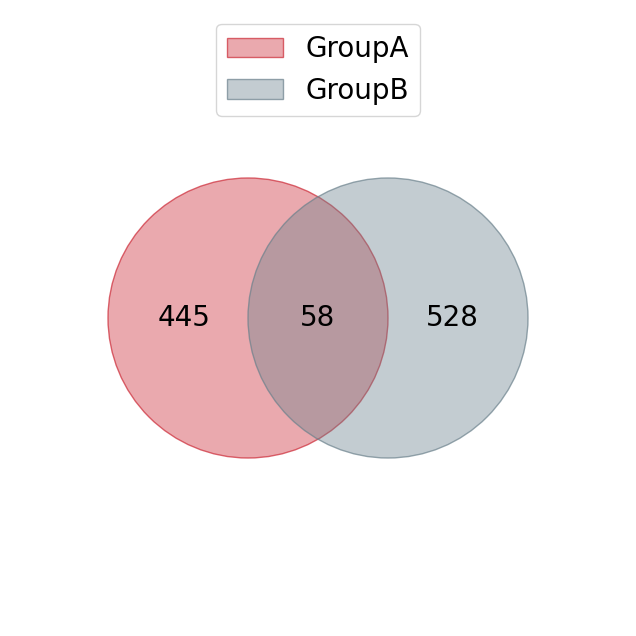

In [17]:
# используем диаграмму Венна, которая позволяет визуализировать общее в двух выборках
dataset_dict = {'GroupA': set_groupA,'GroupB':set_groupB}
venn(dataset_dict, cmap=["#cc2936", "#6b818c"], figsize=(8,8), fontsize=20, legend_loc='upper center')
plt.rcParams["font.weight"] = "bold"
plt.show()

Мы видим, что таких пользователей 58 человек. Найдем этих пользователей и выделим их в отдельный датасет.

In [18]:
common_set = set_groupA&set_groupB

In [19]:
len(common_set)# проверим, совпадает ли их число с графиком

58

In [20]:
# удалим  из ДФ этих пользователей и пересохраним файл orders.
orders = orders[np.logical_not(orders['userId'].isin(common_set))]

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   orderId  1016 non-null   int64 
 1   userId   1016 non-null   int64 
 2   date     1016 non-null   object
 3   revenue  1016 non-null   int64 
 4   group    1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


Обновленная таблица orders содержит 1016 строк и 5 столбцов. Проверили таблицу orders на наличие дубликатов, пропусков и тип данных. Данные подготовлены к дальнейшему анализу. 

In [22]:
try:
    visitors = pd.read_csv('visitors.csv') # хранит информацию про количество пользователей
except:
    visitors = pd.read_csv('https://cod...visitors.csv')


In [23]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [24]:
visitors.duplicated().sum()

0

In [25]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [26]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Таблица visitors содержит 62 строки и 3 столбца. Проверили таблицу на наличие дубликатов, пропусков и тип данных. Данные подготовлены к дальнейшему анализу. 

Для применения и построения графиков кумулятивных данных, создадим новый ДФ с кумулятивными данными cumulativeData, у которого будут столбцы: 
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.


In [27]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [28]:
# выведем сводную таблицу кумулятивных данных
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


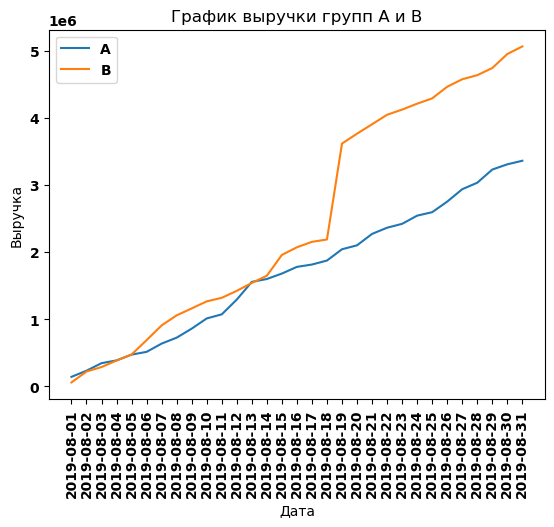

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Добавляем заголовок
plt.title('График выручки групп A и B')

# Подписываем оси
plt.xlabel('Дата')
plt.ylabel('Выручка')

# Поворачиваем даты на 90 градусов
plt.xticks(rotation=90)

plt.legend();  


Группы А и В до середины теста (13 августа) шли примерно параллельно, затем группа В стала показывать бОльшую выручку, а 18 августа произошел сильный скачок вверх (вероятно, аномальная покупка), после которого группа В продолжила наращивать преимущество и сильно ушла в отрыв.  

Необходимо будет в дальнейшем проверить аномалии

#### 2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

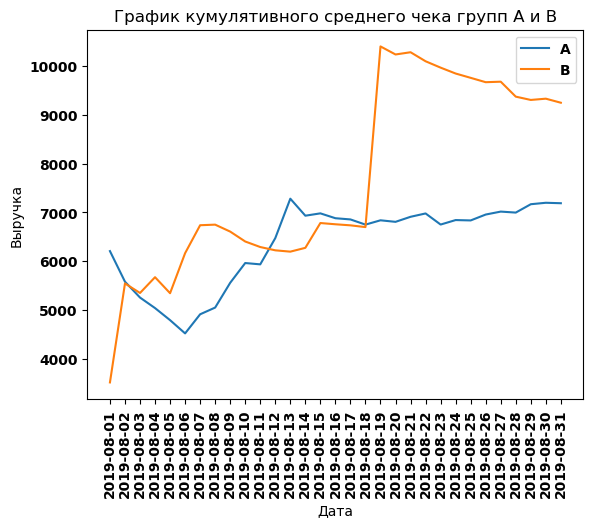

In [30]:
# подсчитаем для каждой группы кумулятивный чек 
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
# Вычислим средний чек для каждой группы делением выручки на колчество заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека групп A и B')

# Подписываем оси
plt.xlabel('Дата')
plt.ylabel('Выручка')

# Поворачиваем даты на 90 градусов
plt.xticks(rotation=90)

plt.legend(); 

Кумулятивные значения среднего чека для групп на графике все равно показывают сильные отклонения (18 и 19 августа в группе В) можно считать аномалиями. Необходимо продолжить анализировать данную метрику.

#### 2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

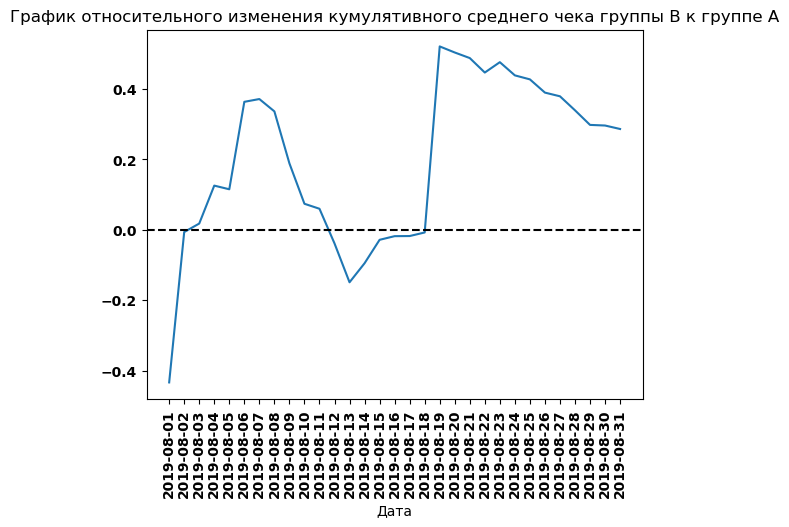

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X - относительно которой мы смотрим варьирование среднего чека.
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

# Подписываем оси
plt.xlabel('Дата')

# Поворачиваем даты на 90 градусов
plt.xticks(rotation=90); 

По графику мы видим, что результаты резко менялись 06-07 августа и 18-19 августа. Скорее всего именно в эти даты были сделаны аномальные покупки.

#### 2.4 Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

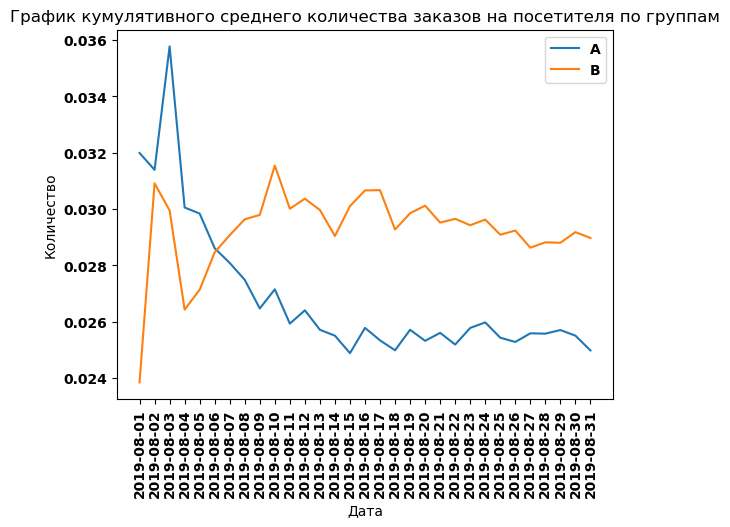

In [32]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

plt.xlabel('Дата')
plt.ylabel('Количество')

plt.xticks(rotation=90)

plt.legend();


В начале теста колебания в обеих группах были достаточно резкими, однако примерно через неделю (6 августа) группа В сравнялась по количеству заказов с группой А, а затем продолжила лидировать по этому показателю и к концу месяца зафиксировалась примерно на уровне 0,029, что было существенно выше группы А, которая зафиксировалась на уровне 0,025.

#### 2.5 Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

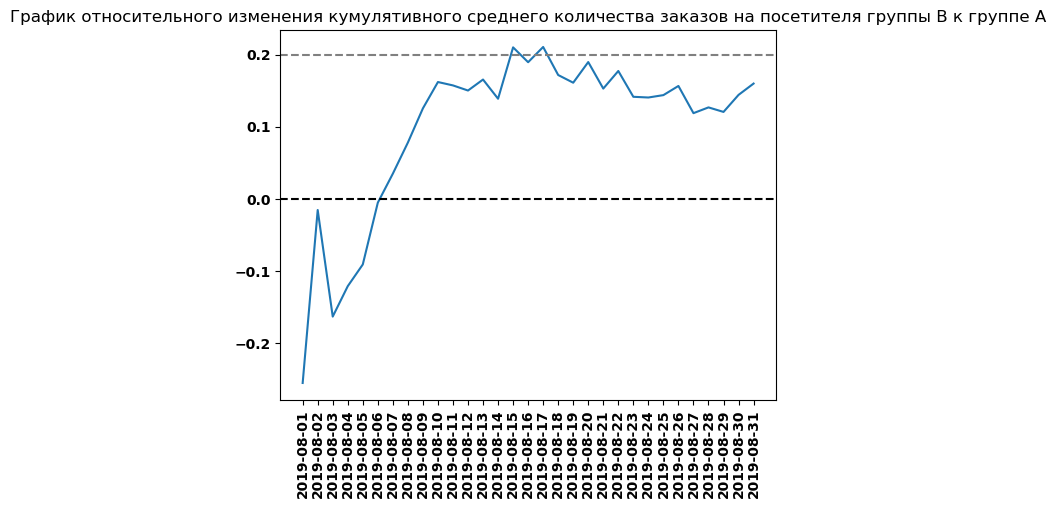

In [33]:
# соединим данные из двух таблиц 
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.xticks(rotation=90)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--');

По графику можно сделать следующий вывод: после некоторого провала на старте, группа В с 3 августа начала постоянноый рост по количеству заказов. Через 2 недели после начала теста группа В достигла макимальных отличий в 20% от группы А, однако с 17 августа этот показатель начал снижаться и зафиксировался к концу месяца примерно на уровне 13-15% превышая группу А.

#### 2.6 Постройте точечный график количества заказов по пользователям.  Сделайте выводы и предположения.

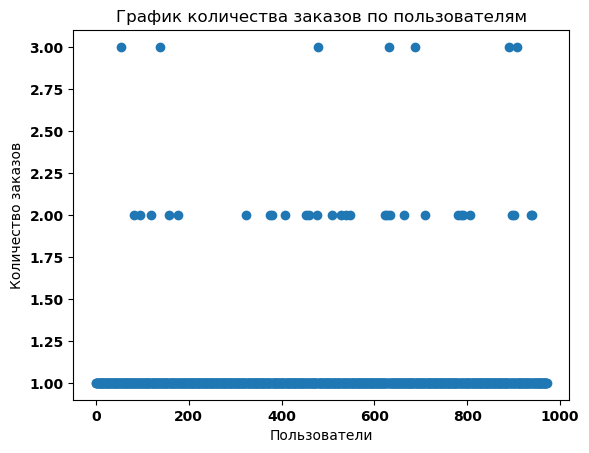

In [34]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('График количества заказов по пользователям')

plt.xlabel('Пользователи')
plt.ylabel('Количество заказов');

По графику мы видим, что большинство пользователей сделало не более 2-х заказов. Есть небольшое количество пользователей, сделавших 3 заказа. 

#### 2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [35]:
# определим 2 заказа это много или мало, подсчитаем 95 и 99 перцентили количества заказов на 1 пользователя.

np.percentile(ordersByUsers['orders'], [95, 99])



array([1., 2.])

Таким образом, мы можем сказать, что не более 5% пользователей делало больше 1 заказа и не более 1% делало более 2 заказов.

**Тем не менее, определим 2 заказа в качестве границы для фильтрации аномальных пользователей.**

#### 2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

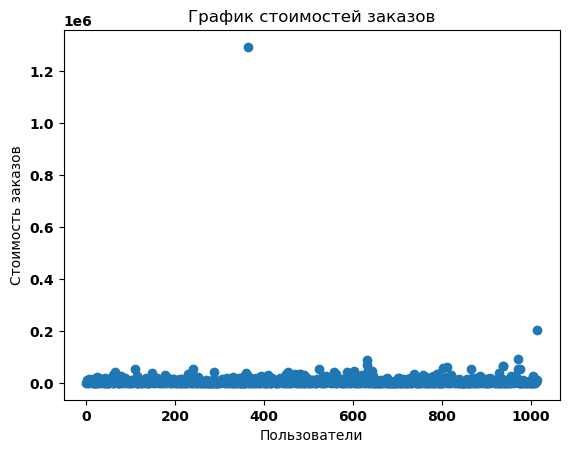

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов')

plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов');

Уберем аномальные заказы для наглядности

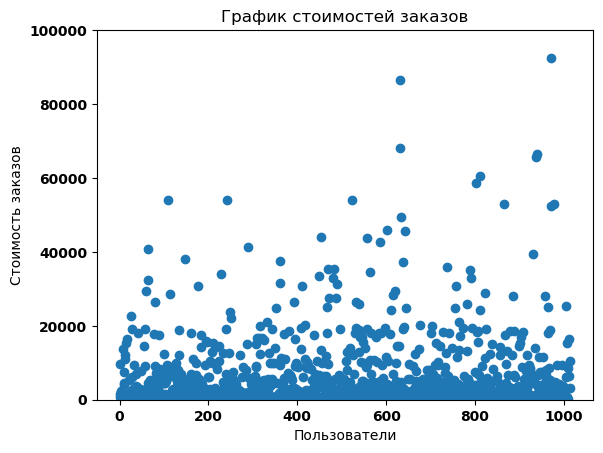

In [37]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов')

plt.ylim([0, 100000])

plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов');

По графику мы видим, что в основном, стоимость заказов в пределах от 0 до 100 000 рублей. Есть выбросы: 200 000 рублей и 1 300 000 рублей. Скорее всего это аномальные заказы. 

#### 2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Таким образом, мы подсчитали, что не более 5% пользователей делают заказ дороже 26 тысяч руублей и не более 1% - более 53 тысяч рублей. 

Определим границу для определения аномальных заказов на уровне 30 тысяч рублей.

#### 2.10 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Перед проведением статистического анализа необходимо выдвинуть нулевую и альтернативную гипотезы. 

Сформулируем гипотезы для нашего проекта. 

- Нулевая гипотеза: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.

Подсчитаем p-value и сравним со значение 0.05, чтобы подтвердить Н0 (если p-value >= 0.05) или опровергнуть и принять альтернативную (если p-value < 0.05).


Для оценки статитстической значимости будем использовать U-метод Манна Уитни 

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value: 0.011
Относительный прирост: 0.160


In [40]:
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772
...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708,0.028801
58,2019-08-30,A,460,437,3311413,18037,0.025503
59,2019-08-30,B,531,511,4955833,18198,0.029179
60,2019-08-31,A,468,445,3364656,18736,0.024979


**P-value 0.011 < 0.05, следовательно, нулевую гипотезу (H0) отвергаем. Значит различия в среднем количестве заказов между группами есть.**

Относительный прирост среднего количества в группе В по отношению к группе А составил 16%.

#### 2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

- Нулевая гипотеза: различий в среднем чеке заказа между группами нет. 
- Альтернативная: различия в среднем чеке заказа между группами есть.

Подсчитаем p-value и сравним со значение 0.05, чтобы подтвердить Н0 (если p-value >= 0.05) или опровергнуть и принять альтернативную (если p-value < 0.05).


In [41]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


**P-value 0.829 > 0.05, следовательно, нулевую гипотезу (H0) не отвергаем. Значит различий в среднем чеке заказа между группами нет.**

Относительный прирост в среднем чеке в группе В по отношению к группе А составил 28,7%. Что заставляет задуматься, почему тогда нет различий в среднем чеке. Возможно, необходимо убрать аномальные значения в заказах. 

#### 2.12 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [42]:
# очистим наши данные от аномалий (те, кто заказал больше 2 раз и заказы дороже 30 тысяч рублей)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.head(5)

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
Name: userId, dtype: int64

Подсчитаем количество аномальных пользователей и уберем их наших данных. 

In [43]:
len(abnormalUsers) #количество аномальных пользователей

49

In [44]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.010
0.187


**P-value 0.010 < 0.05, следовательно, нулевую гипотезу (H0) отвергаем. Значит различия в среднем количестве заказов между группами есть.**

Относительный прирост среднего количества в группе В по отношению к группе А составил 18,7%.

#### 2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [45]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.741
-0.027


**P-value 0.74 > 0.05, следовательно, нулевую гипотезу (H0) не отвергаем. Значит различий в среднем чеке заказа по очищенным от аномальных заказов данным между группами нет.**

Относительная убыль в среднем чеке в группе В по отношению к группе А составила 2,7%. 

Таким образом, мы показали, что нет статистически доказанных различий между группами по среднему чеку, а различия между группами варьируют в переделах 2%. 

### Таким образом, мы можем сделать вывод по 2 части проекта:
- мы показали, что после удаления аномальных значений из данных (пользователи, которые делали более 2 заказов и заказы дороже 30 тысяч рублей) нет различий между группами А и В по среднему чеку, т.е. пользователи в обеих группах заказывали примерно на одинаковую сумму.
- в то же время, было показано, что существуют статистически достоверные данные о различиях по количеству заказов между группами А и В, что вполне объяснимо. Если пользователям из группы В периодически приходили,напрмер, рассылки по e-mail (гипотиза 7) с напоминаниями о магазине, его товарах, услугах или распродажах, то вполне возможно, что эти пользователи не остановились на 1 заказе, а сделали их 2. Тем самым увеличили количество заказов.

## Решение: остановить тест, зафиксировать победу группы В.

## Выводы: 
1. В процессе данного исследования перед нами стояли следующие задачи: 
 - приоритизировать предложенные гипотезы, 
 - запустить A/B-тест и проанализировать результаты, 
 - дать предложения для увеличения выручки.
2. В процессе анализа данных мы продсчитали два дополнительных показателя для рассчета приоритетности гипотез (ICE и RICE). После приоритизации гипотез, нами были выбраны 4 основных: №7, №2, №6 и №0. 
3. Если бы требовалось проведение А/В теста для проверки только **одной гипотезы**, я бы выбрала гипотезу 7 (для сбора  e-mails), поскольку, помимо всего вышеперечисленного, из опубликованных данных есть достаточно достоверная информация  о высокой эффективности e-mail рассылок. 
3. В рамках проведения A/B-теста были статистически проверены различия между группами по количеству заказов и среднему чеку. Были удалены из анализа аномальные значения (большое калочество заказов и большие суммы заказов) и снова проверены показатели. 
4. Было показано, что нет различий между группами А и В по среднему чеку, т.е. пользователи в обеих группах заказывали примерно на одинаковую сумму.
5. Было показано, что существуют статистически достоверные данные о различиях по количеству заказов между группами А и В, что вполне объяснимо. Если пользователям из группы В периодически приходили,напрмер, рассылки по e-mail (гипотиза 7) с напоминаниями о магазине, его товарах, услугах или распродажах, то вполне возможно, что эти пользователи не остановились на 1 заказе, а сделали их 2. Тем самым увеличили количество заказов.

## Рекомендации

- поскольку средний чек сложнее увеличить, можно использовать приемы для увеличения количества заказов: использовать e-mail-рассылки для напоминания о магазине, присылать в них коды на скидки или рекламировать в рассылке ТОП-товары, или идеи для подарков к празникам и т.д.
- добавить новые каналы для привлечения клиентов
- разместить на главной странице баннеры для быстрой покупки ТОП-товаров или подарков к праздникам.